In [66]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Need to adjust gross revenue to account for inflation over time
## adjusted value = (old value * cpi current)/cpi old


In [67]:
#example: 1963 film Tom Jones adjusted to 2020 prices fr normalized comparison
(376000000*258.811)/30.625000

3177565257.1428566

In [68]:
#### NEED TO RE_RUN WITH ANNUAL CPI, NOT AVG for most accurate numbers
#import CPI (Consumer Price Index for "all items" from US Bereau of Labor Statistics)
cpi = pd.read_csv('annual_cpi.csv')
cpi.head()

,year,annual
0,1963,30.6
1,1964,31.0
2,1965,31.5
3,1966,32.4
4,1967,33.4


In [69]:
#import df with gross revenue
bp_full_df = pd.read_csv('bp_clean.csv')
bp_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         334 non-null    object 
 1   rating        334 non-null    object 
 2   genre         334 non-null    object 
 3   summary       334 non-null    object 
 4   gross         325 non-null    float64
 5   release_year  334 non-null    int64  
 6   category      334 non-null    object 
 7   oscar_year    334 non-null    int64  
 8   winner        334 non-null    int64  
 9   film          334 non-null    object 
 10  producer      334 non-null    object 
 11  genre_1       334 non-null    object 
 12  genre_2       298 non-null    object 
 13  genre_3       202 non-null    object 
 14  runtime_min   334 non-null    int64  
dtypes: float64(1), int64(4), object(10)
memory usage: 39.3+ KB


In [70]:
#join tables on year - Gross revenue is totalled in oscar year (not release year)
adjusted = pd.merge(bp_full_df, cpi, left_on= 'oscar_year', right_on ='year', how='outer')

adjusted.head()

,title,rating,genre,summary,gross,release_year,category,oscar_year,winner,film,producer,genre_1,genre_2,genre_3,runtime_min,year,annual
0,Jojo Rabbit,PG-13,"Comedy, Drama, War",A young German boy in the Hitler Youth whose h...,349555.0,2019,Best Picture,2020,0,Jojo Rabbit,"Carthew Neal, Taika Waititi, and Chelsea Winst...",Comedy,Drama,War,108,2020,258.811
1,Marriage Story,R,"Drama, Romance",Noah Baumbach's incisive and compassionate loo...,2000000.0,2019,Best Picture,2020,0,Marriage Story,Noah Baumbach and David Heyman,Drama,Romance,NaN,137,2020,258.811
2,The Irishman,R,"Biography, Crime, Drama",Hitman Frank Sheeran looks back at the secrets...,7000000.0,2019,Best Picture,2020,0,The Irishman,"Martin Scorsese, Robert De Niro, Jane Rosentha...",Biography,Crime,Drama,209,2020,258.811
3,Parasite,R,"Comedy, Drama, Thriller",Greed and class discrimination threaten the ne...,53367844.0,2019,Best Picture,2020,1,Parasite,Kwak Sin-ae and Bong Joon-ho,Comedy,Drama,Thriller,132,2020,258.811
4,Little Women,PG,"Drama, Romance","Jo March reflects back and forth on her life, ...",108101214.0,2019,Best Picture,2020,0,Little Women,Amy Pascal,Drama,Romance,NaN,135,2020,258.811


In [71]:
#give 2020 cpi a column for future calculations
adjusted['cpi_2020'] = 258.811
adjusted.tail()

,title,rating,genre,summary,gross,release_year,category,oscar_year,winner,film,producer,genre_1,genre_2,genre_3,runtime_min,year,annual,cpi_2020
329,Mutiny on the Bounty,Not Rated,"Adventure, Drama, History","In 1787, British ship Bounty leaves Portsmouth...",13680000.0,1962,Best Picture,1963,0,Mutiny on the Bounty,Aaron Rosenberg,Adventure,Drama,History,178,1963,30.6,258.811
330,The Music Man,G,"Comedy, Family, Musical",Traveling con artist Harold Hill targets the n...,14953846.0,1962,Best Picture,1963,0,The Music Man,Morton Da Costa,Comedy,Family,Musical,151,1963,30.6,258.811
331,The Longest Day,G,"Action, Drama, History","The events of D-Day, told on a grand scale fro...",39100000.0,1962,Best Picture,1963,0,The Longest Day,Darryl F. Zanuck,Action,Drama,History,178,1963,30.6,258.811
332,Lawrence of Arabia,Approved,"Adventure, Biography, Drama","The story of T.E. Lawrence, the English office...",44824144.0,1962,Best Picture,1963,1,Lawrence of Arabia,Sam Spiegel,Adventure,Biography,Drama,218,1963,30.6,258.811
333,To Kill a Mockingbird,Approved,"Crime, Drama","Atticus Finch, a widowed lawyer in Depression-...",592237.0,1962,Best Picture,1963,0,To Kill a Mockingbird,Alan J. Pakula,Crime,Drama,NaN,129,1963,30.6,258.811


In [72]:
#reorganize columns for readability & easy data validation
adjusted = adjusted.reindex(columns=['title', 'film', 'rating', 'runtime_min', 'summary', 'producer', 'genre', 'genre_1', 'genre_2', 'genre_3', 'release_year', 'oscar_year', 'year', 'category', 'winner', 'year', 'gross', 'annual', 'cpi_2020'])
adjusted = adjusted.rename(columns={'year':'cpi_year', 'annual':'annual_cpi', 'category':'oscar_category'})
adjusted

,title,film,rating,runtime_min,summary,producer,genre,genre_1,genre_2,genre_3,release_year,oscar_year,cpi_year,oscar_category,winner,cpi_year,gross,annual_cpi,cpi_2020
0,Jojo Rabbit,Jojo Rabbit,PG-13,108,A young German boy in the Hitler Youth whose h...,"Carthew Neal, Taika Waititi, and Chelsea Winst...","Comedy, Drama, War",Comedy,Drama,War,2019,2020,2020,Best Picture,0,2020,349555.0,258.811,258.811
1,Marriage Story,Marriage Story,R,137,Noah Baumbach's incisive and compassionate loo...,Noah Baumbach and David Heyman,"Drama, Romance",Drama,Romance,NaN,2019,2020,2020,Best Picture,0,2020,2000000.0,258.811,258.811
2,The Irishman,The Irishman,R,209,Hitman Frank Sheeran looks back at the secrets...,"Martin Scorsese, Robert De Niro, Jane Rosentha...","Biography, Crime, Drama",Biography,Crime,Drama,2019,2020,2020,Best Picture,0,2020,7000000.0,258.811,258.811
3,Parasite,Parasite,R,132,Greed and class discrimination threaten the ne...,Kwak Sin-ae and Bong Joon-ho,"Comedy, Drama, Thriller",Comedy,Drama,Thriller,2019,2020,2020,Best Picture,1,2020,53367844.0,258.811,258.811
4,Little Women,Little Women,PG,135,"Jo March reflects back and forth on her life, ...",Amy Pascal,"Drama, Romance",Drama,Romance,NaN,2019,2020,2020,Best Picture,0,2020,108101214.0,258.811,258.811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,Mutiny on the Bounty,Mutiny on the Bounty,Not Rated,178,"In 1787, British ship Bounty leaves Portsmouth...",Aaron Rosenberg,"Adventure, Drama, History",Adventure,Drama,History,1962,1963,1963,Best Picture,0,1963,13680000.0,30.600,258.811
330,The Music Man,The Music Man,G,151,Traveling con artist Harold Hill targets the n...,Morton Da Costa,"Comedy, Family, Musical",Comedy,Family,Musical,1962,1963,1963,Best Picture,0,1963,14953846.0,30.600,258.811
331,The Longest Day,The Longest Day,G,178,"The events of D-Day, told on a grand scale fro...",Darryl F. Zanuck,"Action, Drama, History",Action,Drama,History,1962,1963,1963,Best Picture,0,1963,39100000.0,30.600,258.811
332,Lawrence of Arabia,Lawrence of Arabia,Approved,218,"The story of T.E. Lawrence, the English office...",Sam Spiegel,"Adventure, Biography, Drama",Adventure,Biography,Drama,1962,1963,1963,Best Picture,1,1963,44824144.0,30.600,258.811


In [75]:
#test - success!
(adjusted.loc[1, 'gross']*adjusted.loc[1, 'cpi_2020'])/adjusted.loc[1, 'annual_cpi']

2000000.0

In [77]:
adjusted['adjusted_gross'] = round((adjusted['gross']*adjusted['cpi_2020'])/adjusted['annual_cpi'], 0)

In [9]:
normalized

,title,rating,genre,summary,gross,release_year,category,nominee,oscar_year,winner,genre_1,genre_2,genre_3,runtime_min,Year,avg_cpi,cpi_2020,adjusted_gross
0,Jojo Rabbit,PG-13,"Comedy, Drama, War",A young German boy in the Hitler Youth whose h...,349555.0,2019,Best Picture,Jojo Rabbit,2020,0,Comedy,Drama,War,108,2020,258.811167,258.811167,349555.0
1,Sound of Metal,R,"Drama, Music",A heavy-metal drummer's life is thrown into fr...,516520.0,2019,Best Picture,Sound of Metal,2020,0,Drama,Music,NaN,120,2020,258.811167,258.811167,516520.0
2,Marriage Story,R,"Drama, Romance",Noah Baumbach's incisive and compassionate loo...,2000000.0,2019,Best Picture,Marriage Story,2020,0,Drama,Romance,NaN,137,2020,258.811167,258.811167,2000000.0
3,The Irishman,R,"Biography, Crime, Drama",Hitman Frank Sheeran looks back at the secrets...,7000000.0,2019,Best Picture,The Irishman,2020,0,Biography,Crime,Drama,209,2020,258.811167,258.811167,7000000.0
4,Parasite,R,"Comedy, Drama, Thriller",Greed and class discrimination threaten the ne...,53367844.0,2019,Best Picture,Parasite,2020,1,Comedy,Drama,Thriller,132,2020,258.811167,258.811167,53367844.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,Mutiny on the Bounty,Not Rated,"Adventure, Drama, History","In 1787, British ship Bounty leaves Portsmouth...",13680000.0,1962,Best Picture,Mutiny on the Bounty,1963,0,Adventure,Drama,History,178,1963,30.625000,258.811167,115609364.0
331,The Music Man,G,"Comedy, Family, Musical",Traveling con artist Harold Hill targets the n...,14953846.0,1962,Best Picture,Meredith Willson's The Music Man,1963,0,Comedy,Family,Musical,151,1963,30.625000,258.811167,126374607.0
332,The Longest Day,G,"Action, Drama, History","The events of D-Day, told on a grand scale fro...",39100000.0,1962,Best Picture,The Longest Day,1963,0,Action,Drama,History,178,1963,30.625000,258.811167,330433196.0
333,Lawrence of Arabia,Approved,"Adventure, Biography, Drama","The story of T.E. Lawrence, the English office...",44824144.0,1962,Best Picture,Lawrence of Arabia,1963,1,Adventure,Biography,Drama,218,1963,30.625000,258.811167,378807805.0


# Now that the gross is adjusted, we can explore aggregations and charts

In [78]:
#avg adjusted gross of all winners = 265 M
print('Average adjusted gross of all winners:', round(adjusted.query('winner ==1')['adjusted_gross'].mean(), 2))

Average adjusted gross of all winners: 265626011.53


In [79]:
#avg adjusted gross of all losers = 164 M
print('Average adjusted gross of all losers:', round(adjusted.query('winner == 0')['adjusted_gross'].mean(), 2))

Average adjusted gross of all losers: 164704987.03


In [80]:
#avg adjusted gross of all nominees - 182 M
print('Average adjusted gross of all nominees:', round(adjusted['adjusted_gross'].mean(), 2))

Average adjusted gross of all nominees: 183026034.55


In [81]:
#same with min
print('Min adjusted gross of all winners:', round(adjusted.query('winner==1')['adjusted_gross'].min(), 2))
print('Min adjusted gross of all losers:   ', round(adjusted.query('winner == 0')['adjusted_gross'].min(), 2))
print('Min adjusted gross of all nominees: ', round(adjusted['adjusted_gross'].min(), 2))

Min adjusted gross of all winners: 20198466.0
Min adjusted gross of all losers:    349555.0
Min adjusted gross of all nominees:  349555.0


In [82]:
#who was that? ^^ Jojo Rabbit
adjusted.sort_values('adjusted_gross').head(1)

,title,film,rating,runtime_min,summary,producer,genre,genre_1,genre_2,genre_3,release_year,oscar_year,cpi_year,oscar_category,winner,cpi_year,gross,annual_cpi,cpi_2020,adjusted_gross
0,Jojo Rabbit,Jojo Rabbit,PG-13,108,A young German boy in the Hitler Youth whose h...,"Carthew Neal, Taika Waititi, and Chelsea Winst...","Comedy, Drama, War",Comedy,Drama,War,2019,2020,2020,Best Picture,0,2020,349555.0,258.811,258.811,349555.0


In [83]:
#same with max
print('Max adjusted gross of all winners: ', round(adjusted.query('winner==1')['adjusted_gross'].max(), 2))
print('Max adjusted gross of all losers:  ', round(adjusted.query('winner == 0')['adjusted_gross'].max(), 2))
print('Max adjusted gross of all nominees:', round(adjusted['adjusted_gross'].max(), 2))

Max adjusted gross of all winners:  1303754709.0
Max adjusted gross of all losers:   1281115006.0
Max adjusted gross of all nominees: 1303754709.0


In [85]:
#who has the highest adjusted gross of all best picture nominees? 1.3 B
adjusted.sort_values('adjusted_gross', ascending=False).head(1)

,title,film,rating,runtime_min,summary,producer,genre,genre_1,genre_2,genre_3,release_year,oscar_year,cpi_year,oscar_category,winner,cpi_year,gross,annual_cpi,cpi_2020,adjusted_gross
316,The Sound of Music,The Sound of Music,G,172,A young novitiate is sent by her convent in 19...,Robert Wise,"Biography, Drama, Family",Biography,Drama,Family,1965,1966,1966,Best Picture,1,1966,163214286.0,32.4,258.811,1.303755e+09


# Explore Runtime

In [86]:
aggfuncs = ['mad', 'std', 'var', 'mean', 'median', 'quantile', pd.Series.mode]
mini_runtime_stats = adjusted.groupby('winner')['runtime_min'].agg(aggfuncs).reset_index()
mini_runtime_stats

,winner,mad,std,var,mean,median,quantile,mode
0,0,18.440172,23.700863,561.730909,129.541818,127.0,127.0,127
1,1,25.240448,30.019300,901.158387,140.745763,131.0,131.0,120


In [18]:
#winners have longer runtimes? ^^ 

# Explore title length

In [87]:
help(len)

Help on built-in function len in module builtins:

len(obj, /)
    Return the number of items in a container.



In [88]:
#find len of title, then len of title without spaces, result+1 = number of words in title
#let's try...
test = adjusted['title'][0]
print(test)
print(len(test))
print(len(test.replace(' ', '')))
print((len(test)-(len(test.replace(' ', ''))))+1)

Jojo Rabbit
11
10
2


In [89]:
test2 = adjusted['title'][1]
print(test2)
print(len(test2))
print(len(test2.replace(' ', '')))
print((len(test2)-(len(test2.replace(' ', ''))))+1)

Marriage Story
14
13
2


In [90]:
#single line challenge?
(len(adjusted['title'][0])-len(adjusted['title'][0].replace(' ', '')))+1

2

In [92]:
#make it's own df
length = adjusted[['title']]
length

,title
0,Jojo Rabbit
1,Marriage Story
2,The Irishman
3,Parasite
4,Little Women
...,...
329,Mutiny on the Bounty
330,The Music Man
331,The Longest Day
332,Lawrence of Arabia


In [93]:
#iterrows

for index, row in length.iterrows():
        length.loc[index,'title_length'] = round((len(length.loc[index, 'title'])-len(length.loc[index, 'title'].replace(' ', '')))+1, 0)
    
length

C:\Users\zoete\AppData\Local\Temp\ipykernel_28392\2157753790.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  length.loc[index,'title_length'] = round((len(length.loc[index, 'title'])-len(length.loc[index, 'title'].replace(' ', '')))+1, 0)


,title,title_length
0,Jojo Rabbit,2.0
1,Marriage Story,2.0
2,The Irishman,2.0
3,Parasite,1.0
4,Little Women,2.0
...,...,...
329,Mutiny on the Bounty,4.0
330,The Music Man,3.0
331,The Longest Day,3.0
332,Lawrence of Arabia,3.0


In [94]:
adjusted.head()

,title,film,rating,runtime_min,summary,producer,genre,genre_1,genre_2,genre_3,release_year,oscar_year,cpi_year,oscar_category,winner,cpi_year,gross,annual_cpi,cpi_2020,adjusted_gross
0,Jojo Rabbit,Jojo Rabbit,PG-13,108,A young German boy in the Hitler Youth whose h...,"Carthew Neal, Taika Waititi, and Chelsea Winst...","Comedy, Drama, War",Comedy,Drama,War,2019,2020,2020,Best Picture,0,2020,349555.0,258.811,258.811,349555.0
1,Marriage Story,Marriage Story,R,137,Noah Baumbach's incisive and compassionate loo...,Noah Baumbach and David Heyman,"Drama, Romance",Drama,Romance,NaN,2019,2020,2020,Best Picture,0,2020,2000000.0,258.811,258.811,2000000.0
2,The Irishman,The Irishman,R,209,Hitman Frank Sheeran looks back at the secrets...,"Martin Scorsese, Robert De Niro, Jane Rosentha...","Biography, Crime, Drama",Biography,Crime,Drama,2019,2020,2020,Best Picture,0,2020,7000000.0,258.811,258.811,7000000.0
3,Parasite,Parasite,R,132,Greed and class discrimination threaten the ne...,Kwak Sin-ae and Bong Joon-ho,"Comedy, Drama, Thriller",Comedy,Drama,Thriller,2019,2020,2020,Best Picture,1,2020,53367844.0,258.811,258.811,53367844.0
4,Little Women,Little Women,PG,135,"Jo March reflects back and forth on her life, ...",Amy Pascal,"Drama, Romance",Drama,Romance,NaN,2019,2020,2020,Best Picture,0,2020,108101214.0,258.811,258.811,108101214.0


In [95]:
title_length = pd.merge(adjusted, length, on='title', how='outer')
title_length.head()

,title,film,rating,runtime_min,summary,producer,genre,genre_1,genre_2,genre_3,...,oscar_year,cpi_year,oscar_category,winner,cpi_year,gross,annual_cpi,cpi_2020,adjusted_gross,title_length
0,Jojo Rabbit,Jojo Rabbit,PG-13,108,A young German boy in the Hitler Youth whose h...,"Carthew Neal, Taika Waititi, and Chelsea Winst...","Comedy, Drama, War",Comedy,Drama,War,...,2020,2020,Best Picture,0,2020,349555.0,258.811,258.811,349555.0,2.0
1,Marriage Story,Marriage Story,R,137,Noah Baumbach's incisive and compassionate loo...,Noah Baumbach and David Heyman,"Drama, Romance",Drama,Romance,NaN,...,2020,2020,Best Picture,0,2020,2000000.0,258.811,258.811,2000000.0,2.0
2,The Irishman,The Irishman,R,209,Hitman Frank Sheeran looks back at the secrets...,"Martin Scorsese, Robert De Niro, Jane Rosentha...","Biography, Crime, Drama",Biography,Crime,Drama,...,2020,2020,Best Picture,0,2020,7000000.0,258.811,258.811,7000000.0,2.0
3,Parasite,Parasite,R,132,Greed and class discrimination threaten the ne...,Kwak Sin-ae and Bong Joon-ho,"Comedy, Drama, Thriller",Comedy,Drama,Thriller,...,2020,2020,Best Picture,1,2020,53367844.0,258.811,258.811,53367844.0,1.0
4,Little Women,Little Women,PG,135,"Jo March reflects back and forth on her life, ...",Amy Pascal,"Drama, Romance",Drama,Romance,NaN,...,2020,2020,Best Picture,0,2020,108101214.0,258.811,258.811,108101214.0,2.0


#move that column somewhere more helpful
title_length = title_length.reindex(columns=['title', 'film', 'title_length', 'rating', 'runtime_min', 'summary', 'producer', 'genre', 'genre_1', 'genre_2', 'genre_3', 'release_year', 'oscar_year', 'cpi_year', 'oscar_category', 'winner', 'annual_cpi', 'cpi_2020', 'gross', 'adjusted_gross'])
title_length
#error message - cannot reindex with duplicate labels (?)

In [98]:
title_length[['winner', 'title_length']].groupby('winner').mean()

,title_length
winner,
0,2.610909
1,2.627119


In [99]:
nominee_length = title_length[['title_length', 'winner']].groupby('title_length').count().sort_values('winner', ascending=False).reset_index().rename(columns={'winner':'nominee'})
nominee_length

,title_length,nominee
0,2.0,101
1,1.0,85
2,3.0,79
3,4.0,35
4,5.0,20
5,6.0,7
6,8.0,2
7,9.0,2
8,10.0,2
9,13.0,1


Text(0, 0.5, 'Number of Nominees')

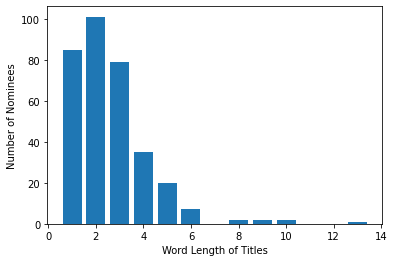

In [100]:
plt.bar(nominee_length['title_length'], nominee_length['nominee'])
plt.xlabel('Word Length of Titles')
plt.ylabel('Number of Nominees')

In [101]:
winners = title_length.query('winner==1')
winners.head()

,title,film,rating,runtime_min,summary,producer,genre,genre_1,genre_2,genre_3,...,oscar_year,cpi_year,oscar_category,winner,cpi_year,gross,annual_cpi,cpi_2020,adjusted_gross,title_length
3,Parasite,Parasite,R,132,Greed and class discrimination threaten the ne...,Kwak Sin-ae and Bong Joon-ho,"Comedy, Drama, Thriller",Comedy,Drama,Thriller,...,2020,2020,Best Picture,1,2020,53367844.0,258.811,258.811,53367844.0,1.0
13,Green Book,Green Book,PG-13,130,A working-class Italian-American bouncer becom...,"Jim Burke, Charles B. Wessler, Brian Currie, P...","Biography, Comedy, Drama",Biography,Comedy,Drama,...,2019,2019,Best Picture,1,2019,85080171.0,255.657,258.811,86129792.0,2.0
22,The Shape of Water,The Shape of Water,R,123,At a top secret research facility in the 1960s...,Guillermo del Toro and J. Miles Dale,"Drama, Fantasy, Romance",Drama,Fantasy,Romance,...,2018,2018,Best Picture,1,2018,63859435.0,251.107,258.811,65818652.0,4.0
27,Moonlight,Moonlight,R,111,A young African-American man grapples with his...,"Adele Romanski, Dede Gardner, and Jeremy Kleiner",Drama,Drama,NaN,NaN,...,2017,2017,Best Picture,1,2017,27854932.0,245.120,258.811,29410749.0,1.0
37,Spotlight,Spotlight,R,129,The true story of how the Boston Globe uncover...,"Blye Pagon Faust, Steve Golin, Nicole Rocklin,...","Biography, Crime, Drama",Biography,Crime,Drama,...,2016,2016,Best Picture,1,2016,45055776.0,240.007,258.811,48585793.0,1.0


In [102]:
winner_length = winners[['title_length', 'winner']].groupby('title_length').sum().sort_values('winner', ascending=False).reset_index()
winner_length

,title_length,winner
0,3.0,18
1,1.0,16
2,2.0,14
3,4.0,5
4,5.0,3
5,6.0,2
6,10.0,1


Text(0, 0.5, 'Number of Winners')

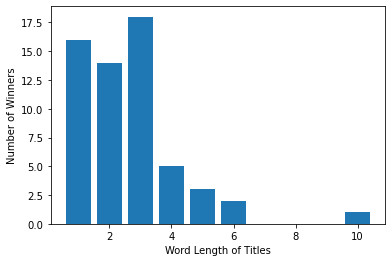

In [103]:
plt.bar(winner_length['title_length'], winner_length['winner'])
plt.xlabel('Word Length of Titles')
plt.ylabel('Number of Winners')

In [104]:
losers = title_length.query('winner==0')
losers.head()

,title,film,rating,runtime_min,summary,producer,genre,genre_1,genre_2,genre_3,...,oscar_year,cpi_year,oscar_category,winner,cpi_year,gross,annual_cpi,cpi_2020,adjusted_gross,title_length
0,Jojo Rabbit,Jojo Rabbit,PG-13,108,A young German boy in the Hitler Youth whose h...,"Carthew Neal, Taika Waititi, and Chelsea Winst...","Comedy, Drama, War",Comedy,Drama,War,...,2020,2020,Best Picture,0,2020,349555.0,258.811,258.811,349555.0,2.0
1,Marriage Story,Marriage Story,R,137,Noah Baumbach's incisive and compassionate loo...,Noah Baumbach and David Heyman,"Drama, Romance",Drama,Romance,NaN,...,2020,2020,Best Picture,0,2020,2000000.0,258.811,258.811,2000000.0,2.0
2,The Irishman,The Irishman,R,209,Hitman Frank Sheeran looks back at the secrets...,"Martin Scorsese, Robert De Niro, Jane Rosentha...","Biography, Crime, Drama",Biography,Crime,Drama,...,2020,2020,Best Picture,0,2020,7000000.0,258.811,258.811,7000000.0,2.0
4,Little Women,Little Women,PG,135,"Jo March reflects back and forth on her life, ...",Amy Pascal,"Drama, Romance",Drama,Romance,NaN,...,2020,2020,Best Picture,0,2020,108101214.0,258.811,258.811,108101214.0,2.0
5,Ford v Ferrari,Ford v Ferrari,PG-13,152,American car designer Carroll Shelby and drive...,"Peter Chernin, Jenno Topping, and James Mangold","Action, Biography, Drama",Action,Biography,Drama,...,2020,2020,Best Picture,0,2020,117624028.0,258.811,258.811,117624028.0,3.0


In [105]:
loser_length = losers[['title_length', 'winner']].groupby('title_length').count().sort_values('winner', ascending=False).reset_index().rename(columns={'winner':'loser'})
loser_length

,title_length,loser
0,2.0,87
1,1.0,69
2,3.0,61
3,4.0,30
4,5.0,17
5,6.0,5
6,8.0,2
7,9.0,2
8,10.0,1
9,13.0,1


<BarContainer object of 10 artists>

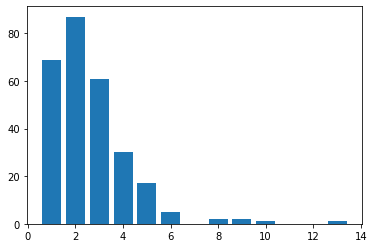

In [106]:
plt.bar(loser_length['title_length'], loser_length['loser'])

In [107]:
title_length.sort_values('title_length', ascending=False).head(10)

,title,film,rating,runtime_min,summary,producer,genre,genre_1,genre_2,genre_3,...,oscar_year,cpi_year,oscar_category,winner,cpi_year,gross,annual_cpi,cpi_2020,adjusted_gross,title_length
319,Dr. Strangelove or: How I Learned to Stop Worr...,Dr. Strangelove or: How I Learned to Stop Worr...,PG,95,An insane American general orders a bombing at...,Stanley Kubrick,"Comedy, War",Comedy,War,NaN,...,1965,1965,Best Picture,0,1965,275902.0,31.500,258.811,2266872.0,13.0
137,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,PG-13,178,A meek Hobbit from the Shire and eight compani...,"Peter Jackson, Fran Walsh, and Barrie M. Osborne","Action, Adventure, Drama",Action,Adventure,Drama,...,2002,2002,Best Picture,0,2002,315544750.0,179.900,258.811,453954710.0,10.0
127,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,PG-13,201,Gandalf and Aragorn lead the World of Men agai...,"Barrie M. Osborne, Peter Jackson, and Fran Walsh","Action, Adventure, Drama",Action,Adventure,Drama,...,2004,2004,Best Picture,1,2004,377845905.0,188.900,258.811,517684894.0,10.0
125,Master and Commander: The Far Side of the World,Master and Commander: The Far Side of the World,PG-13,138,"During the Napoleonic Wars, a brash British ca...","Samuel Goldwyn Jr., Peter Weir, and Duncan Hen...","Action, Adventure, Drama",Action,Adventure,Drama,...,2004,2004,Best Picture,0,2004,93927920.0,188.900,258.811,128690201.0,9.0
237,Indiana Jones and the Raiders of the Lost Ark,Raiders of the Lost Ark,PG,115,Archaeology professor Indiana Jones ventures t...,Frank Marshall,"Action, Adventure",Action,Adventure,NaN,...,1982,1982,Best Picture,0,1982,248159971.0,96.500,258.811,665559899.0,9.0
132,The Lord of the Rings: The Two Towers,The Lord of the Rings: The Two Towers,PG-13,179,While Frodo and Sam edge closer to Mordor with...,"Barrie M. Osborne, Fran Walsh, and Peter Jackson","Action, Adventure, Drama",Action,Adventure,Drama,...,2003,2003,Best Picture,0,2003,342551365.0,184.000,258.811,481826420.0,8.0
310,The Russians Are Coming the Russians Are Coming,"The Russians Are Coming, the Russians Are Coming",Unrated,126,"Without hostile intent, a Soviet submarine run...",Norman Jewison,"Comedy, War",Comedy,War,NaN,...,1967,1967,Best Picture,0,1967,21693114.0,33.400,258.811,168096303.0,8.0
298,Butch Cassidy and the Sundance Kid,Butch Cassidy and the Sundance Kid,PG,110,"Wyoming, early 1900s. Butch Cassidy and The Su...",John Foreman,"Biography, Crime, Drama",Biography,Crime,Drama,...,1970,1970,Best Picture,0,1970,102308889.0,38.800,258.811,682439842.0,6.0
305,In the Heat of the Night,In the Heat of the Night,Approved,110,A black Philadelphia police detective is mista...,Walter Mirisch,"Drama, Mystery, Thriller",Drama,Mystery,Thriller,...,1968,1968,Best Picture,1,1968,24379978.0,34.800,258.811,181316278.0,6.0
101,The Curious Case of Benjamin Button,The Curious Case of Benjamin Button,PG-13,166,"Tells the story of Benjamin Button, a man who ...","Kathleen Kennedy, Frank Marshall, and Ceán Cha...","Drama, Fantasy, Romance",Drama,Fantasy,Romance,...,2009,2009,Best Picture,0,2009,127509326.0,214.537,258.811,153823425.0,6.0


In [108]:
#save for later
winners.to_csv('winners_adjusted.csv', index=False)

In [109]:
#save for later
losers.to_csv('losers_adjusted.csv', index=False)

In [110]:
#save for later
title_length.to_csv('length.csv', index=False)